In [1]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score

In [2]:
data=pd.read_csv('nba_logreg.csv')

In [3]:
data=data.fillna(0.0)

In [4]:
data=data.drop_duplicates()

In [5]:
imenjaci=data.duplicated(subset=['name','gp','min','pts'],keep=False)

In [6]:
imenjaci1=data.loc[imenjaci]
imenjaci1.index

Int64Index([  18,   19,   71,   72,   73,   74,  120,  121,  126,  127,  156,
             157,  158,  159,  162,  164,  165,  167,  168,  170,  223,  224,
             225,  226,  364,  365,  367,  368,  472,  473,  553,  554,  848,
             849,  870,  871, 1126, 1127, 1229, 1230],
           dtype='int64')

In [7]:
data.drop(index=(imenjaci1.index),inplace=True)

In [35]:
Y=data['target_5yrs']
X=data.drop('target_5yrs',axis=1)
X=X.drop(['fg','3p','ft','reb','name'],axis=1)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,stratify=Y)

In [37]:
model=DecisionTreeClassifier(random_state=69)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=69)

In [38]:
rez=cross_val_score(model,x_test,y_test,cv=10,scoring='roc_auc')

In [39]:
from numpy import mean
mean(rez)

0.606172385620915

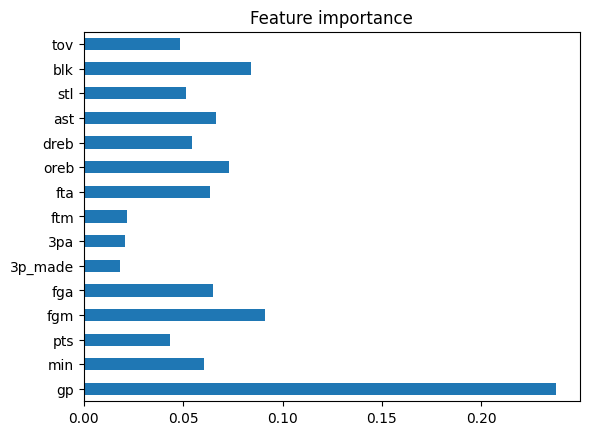

In [40]:
pd.Series(model.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [41]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2,4,6, 8]
         }
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=10,verbose=2)

In [42]:
estimator.fit(x_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini,

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]},
             verbose=2)

In [43]:
estimator.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [44]:
estimator.best_score_

0.6815533980582524

In [45]:
random_forest=RandomForestClassifier(n_estimators=200,max_depth=10,random_state=71,criterion='log_loss')

In [46]:
random_forest.fit(x_train,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=10, n_estimators=200,
                       random_state=71)

In [47]:
pred=random_forest.predict(x_test)

In [48]:
accuracy_score(y_test,pred)

0.7054263565891473

In [49]:
confusion_matrix(y_test,pred)

array([[ 48,  49],
       [ 27, 134]])

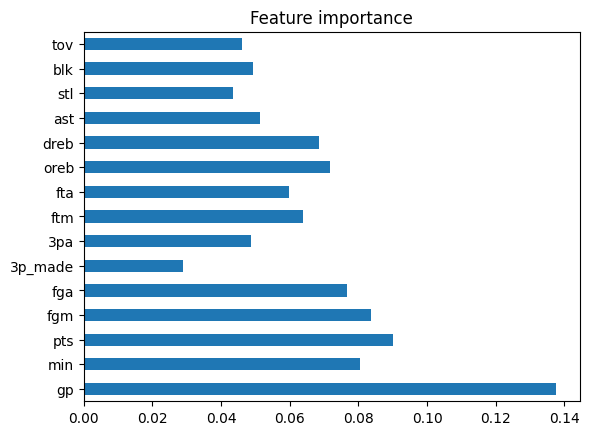

In [50]:
pd.Series(random_forest.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [51]:
params = {'max_depth': [5,7,10,15,None],
          'criterion': ['gini','log_loss'],
          'n_estimators':[200,400,800],
         }

estimator = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=7,verbose=2)

In [52]:
estimator.fit(x_train,y_train)

Fitting 7 folds for each of 30 candidates, totalling 210 fits
[CV] END ......criterion=gini, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ......criterion=gini, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ......criterion=gini, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ......criterion=gini, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ......criterion=gini, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ......criterion=gini, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ......criterion=gini, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ......criterion=gini, max_depth=5, n_estimators=400; total time=   0.4s
[CV] END ......criterion=gini, max_depth=5, n_estimators=400; total time=   0.4s
[CV] END ......criterion=gini, max_depth=5, n_estimators=400; total time=   0.4s
[CV] END ......criterion=gini, max_depth=5, n_estimators=400; total time=   0.4s
[CV] END ......criterion=gini, max_depth=5, n_e

[CV] END ...criterion=gini, max_depth=None, n_estimators=800; total time=   1.0s
[CV] END ...criterion=gini, max_depth=None, n_estimators=800; total time=   1.0s
[CV] END ...criterion=gini, max_depth=None, n_estimators=800; total time=   1.0s
[CV] END ...criterion=gini, max_depth=None, n_estimators=800; total time=   1.0s
[CV] END ..criterion=log_loss, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ..criterion=log_loss, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ..criterion=log_loss, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ..criterion=log_loss, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ..criterion=log_loss, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ..criterion=log_loss, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ..criterion=log_loss, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ..criterion=log_loss, max_depth=5, n_estimators=400; total time=   0.4s
[CV] END ..criterion=log_los

[CV] END criterion=log_loss, max_depth=None, n_estimators=400; total time=   0.5s
[CV] END criterion=log_loss, max_depth=None, n_estimators=800; total time=   1.1s
[CV] END criterion=log_loss, max_depth=None, n_estimators=800; total time=   1.0s
[CV] END criterion=log_loss, max_depth=None, n_estimators=800; total time=   1.0s
[CV] END criterion=log_loss, max_depth=None, n_estimators=800; total time=   1.1s
[CV] END criterion=log_loss, max_depth=None, n_estimators=800; total time=   1.0s
[CV] END criterion=log_loss, max_depth=None, n_estimators=800; total time=   1.0s
[CV] END criterion=log_loss, max_depth=None, n_estimators=800; total time=   1.1s


GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'log_loss'],
                         'max_depth': [5, 7, 10, 15, None],
                         'n_estimators': [200, 400, 800]},
             verbose=2)

In [28]:
estimator.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 400}

In [29]:
random_forest1=RandomForestClassifier(n_estimators=400,max_depth=5,random_state=71,criterion='gini')

In [30]:
random_forest1.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=400, random_state=71)

In [31]:
pred1=random_forest1.predict(x_test)

In [32]:
accuracy_score(y_test,pred1)

0.7209302325581395

In [33]:
confusion_matrix(y_test,pred1)

array([[ 61,  36],
       [ 36, 125]])

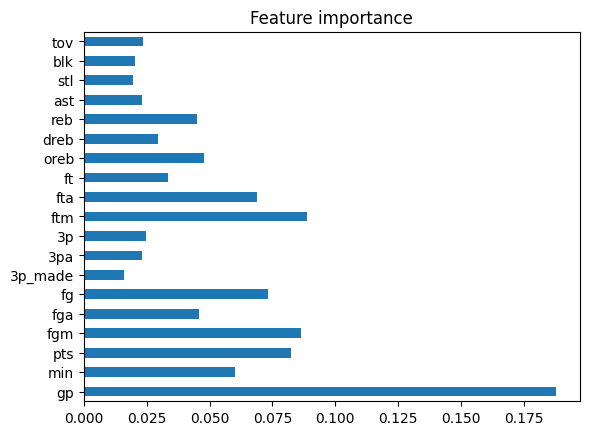

In [34]:
pd.Series(random_forest1.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()